# SAS Innovate Workbench Workshop

## 1. Importing Packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score


# 2. Data preparation

In [2]:
# List all files in the directory
files = os.listdir()

# Filter files that end with .csv
csv_files = [f for f in files if f.endswith('.csv')]

print(csv_files)

['bank.csv', 'Bank_Score.csv', 'Bank_Train.csv']


In [3]:
# Load CSV file as a DataFrame
bank = pd.read_csv(csv_files[0])

In [4]:
# displaying dataframe
bank.head()

,AccountID,Status,Customer_Value,Age,Home_Flag,Homeval,Inc,Pr,Activity_Status,AvgSale3Yr,...,AvgSale3Yr_DP,LastProdAmt,CntPur3Yr,CntPurLife,CntPur3Yr_DP,CntPurLife_DP,CntTotPromo,MnthsLastPur,Cnt1Yr_DP,CustTenure
0,5200000001,1,A,NaN,0,57600,52106,24,High,5.71,...,5.25,10.0,7,22,4,6,20,5,9,92
1,5200000002,1,A,NaN,0,57587,52106,24,High,5.71,...,5.25,10.0,7,22,4,6,20,5,9,92
2,5200000003,1,A,NaN,0,44167,42422,0,High,12.80,...,13.00,12.0,5,16,3,8,27,16,11,91
3,5200000004,0,A,68.0,0,90587,59785,32,High,21.60,...,20.00,25.0,5,21,2,7,19,15,9,123
4,5200000005,0,A,NaN,0,100313,0,0,High,7.33,...,7.60,10.0,6,38,5,19,13,24,6,128


## 3. Exploratory Data Analysis (EDA)

In [5]:
# understanding datasets dimensions
print("Bank_Train data shape:", bank.shape)

Bank_Train data shape: (108600, 21)


Note Score set is bigger than Train.

*DISCUSSION:* Can consider adding synthetic data to Train set.

In [6]:
# understanding column format
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108600 entries, 0 to 108599
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AccountID        108600 non-null  int64  
 1   Status           108600 non-null  int64  
 2   Customer_Value   108600 non-null  object 
 3   Age              81143 non-null   float64
 4   Home_Flag        108600 non-null  int64  
 5   Homeval          108600 non-null  int64  
 6   Inc              108600 non-null  int64  
 7   Pr               108600 non-null  int64  
 8   Activity_Status  108600 non-null  object 
 9   AvgSale3Yr       108600 non-null  float64
 10  AvgSaleLife      108600 non-null  float64
 11  AvgSale3Yr_DP    85445 non-null   float64
 12  LastProdAmt      108600 non-null  float64
 13  CntPur3Yr        108600 non-null  int64  
 14  CntPurLife       108600 non-null  int64  
 15  CntPur3Yr_DP     108600 non-null  int64  
 16  CntPurLife_DP    108600 non-null  int6

In [7]:
# parsing categorical variables
bank["AccountID"] = bank["AccountID"].astype('category')
bank["Status"] = bank["Status"].astype('category')
bank["Customer_Value"] = bank["Customer_Value"].astype('category')
bank["Home_Flag"] = bank["Home_Flag"].astype('category')
bank['Activity_Status'] = bank['Activity_Status'].astype('category')

In [8]:
# missing variable exploration
bank.isna().sum()

AccountID              0
Status                 0
Customer_Value         0
Age                27457
Home_Flag              0
Homeval                0
Inc                    0
Pr                     0
Activity_Status        0
AvgSale3Yr             0
AvgSaleLife            0
AvgSale3Yr_DP      23155
LastProdAmt            0
CntPur3Yr              0
CntPurLife             0
CntPur3Yr_DP           0
CntPurLife_DP          0
CntTotPromo            0
MnthsLastPur           0
Cnt1Yr_DP              0
CustTenure             0
dtype: int64

Only Demog_Age and AvgSale3Yr_DP have missing data, but missing 20-25% of data.

In [9]:
# finding duplicated data
bank.duplicated().sum()

0

In [10]:
# summary statistics
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,81143.0,58.791874,16.912909,0.00,46.00,60.00,73.00,88.00
Homeval,108600.0,113281.503057,99259.281461,0.00,53007.75,78083.50,135201.00,600049.00
Inc,108600.0,40459.551621,28388.996919,0.00,24653.75,43213.00,57223.00,200007.00
Pr,108600.0,29.636298,12.112024,0.00,24.00,30.00,37.00,100.00
AvgSale3Yr,108600.0,16.196828,18.744587,-1.00,10.00,15.00,20.00,3713.31
AvgSaleLife,108600.0,13.471623,9.767661,1.58,8.48,11.67,15.67,650.00
AvgSale3Yr_DP,85445.0,15.424076,18.420151,0.32,10.00,14.00,20.00,3713.31
LastProdAmt,108600.0,17.562853,35.787172,-1.00,10.00,15.00,20.00,10000.00
CntPur3Yr,108600.0,2.905414,2.028177,0.00,1.00,2.00,4.00,18.00
CntPurLife,108600.0,9.574116,8.553524,0.00,3.00,7.00,13.00,126.00


In [11]:
def plot_variable_types(df):
    # Separate continuous and categorical variables
    continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_vars = df.select_dtypes(include=['object', 'category']).columns

    # Plot histograms for continuous variables in one figure
    plt.figure(figsize=(20, 50))
    for i, col in enumerate(continuous_vars):
        plt.subplot(len(continuous_vars)//2 + 1, 2, i + 1)
        plt.hist(df[col], bins=20, edgecolor='black')
        plt.title(f'{col} Distribution (Histogram)')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Plot bar charts for categorical variables in another figure
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(categorical_vars):
        plt.subplot(len(categorical_vars)//2 + 1, 2, i + 1)
        value_counts = df[col].value_counts()
        plt.bar(value_counts.index, value_counts.values, color='skyblue')
        plt.title(f'{col} Distribution (Bar Chart)')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

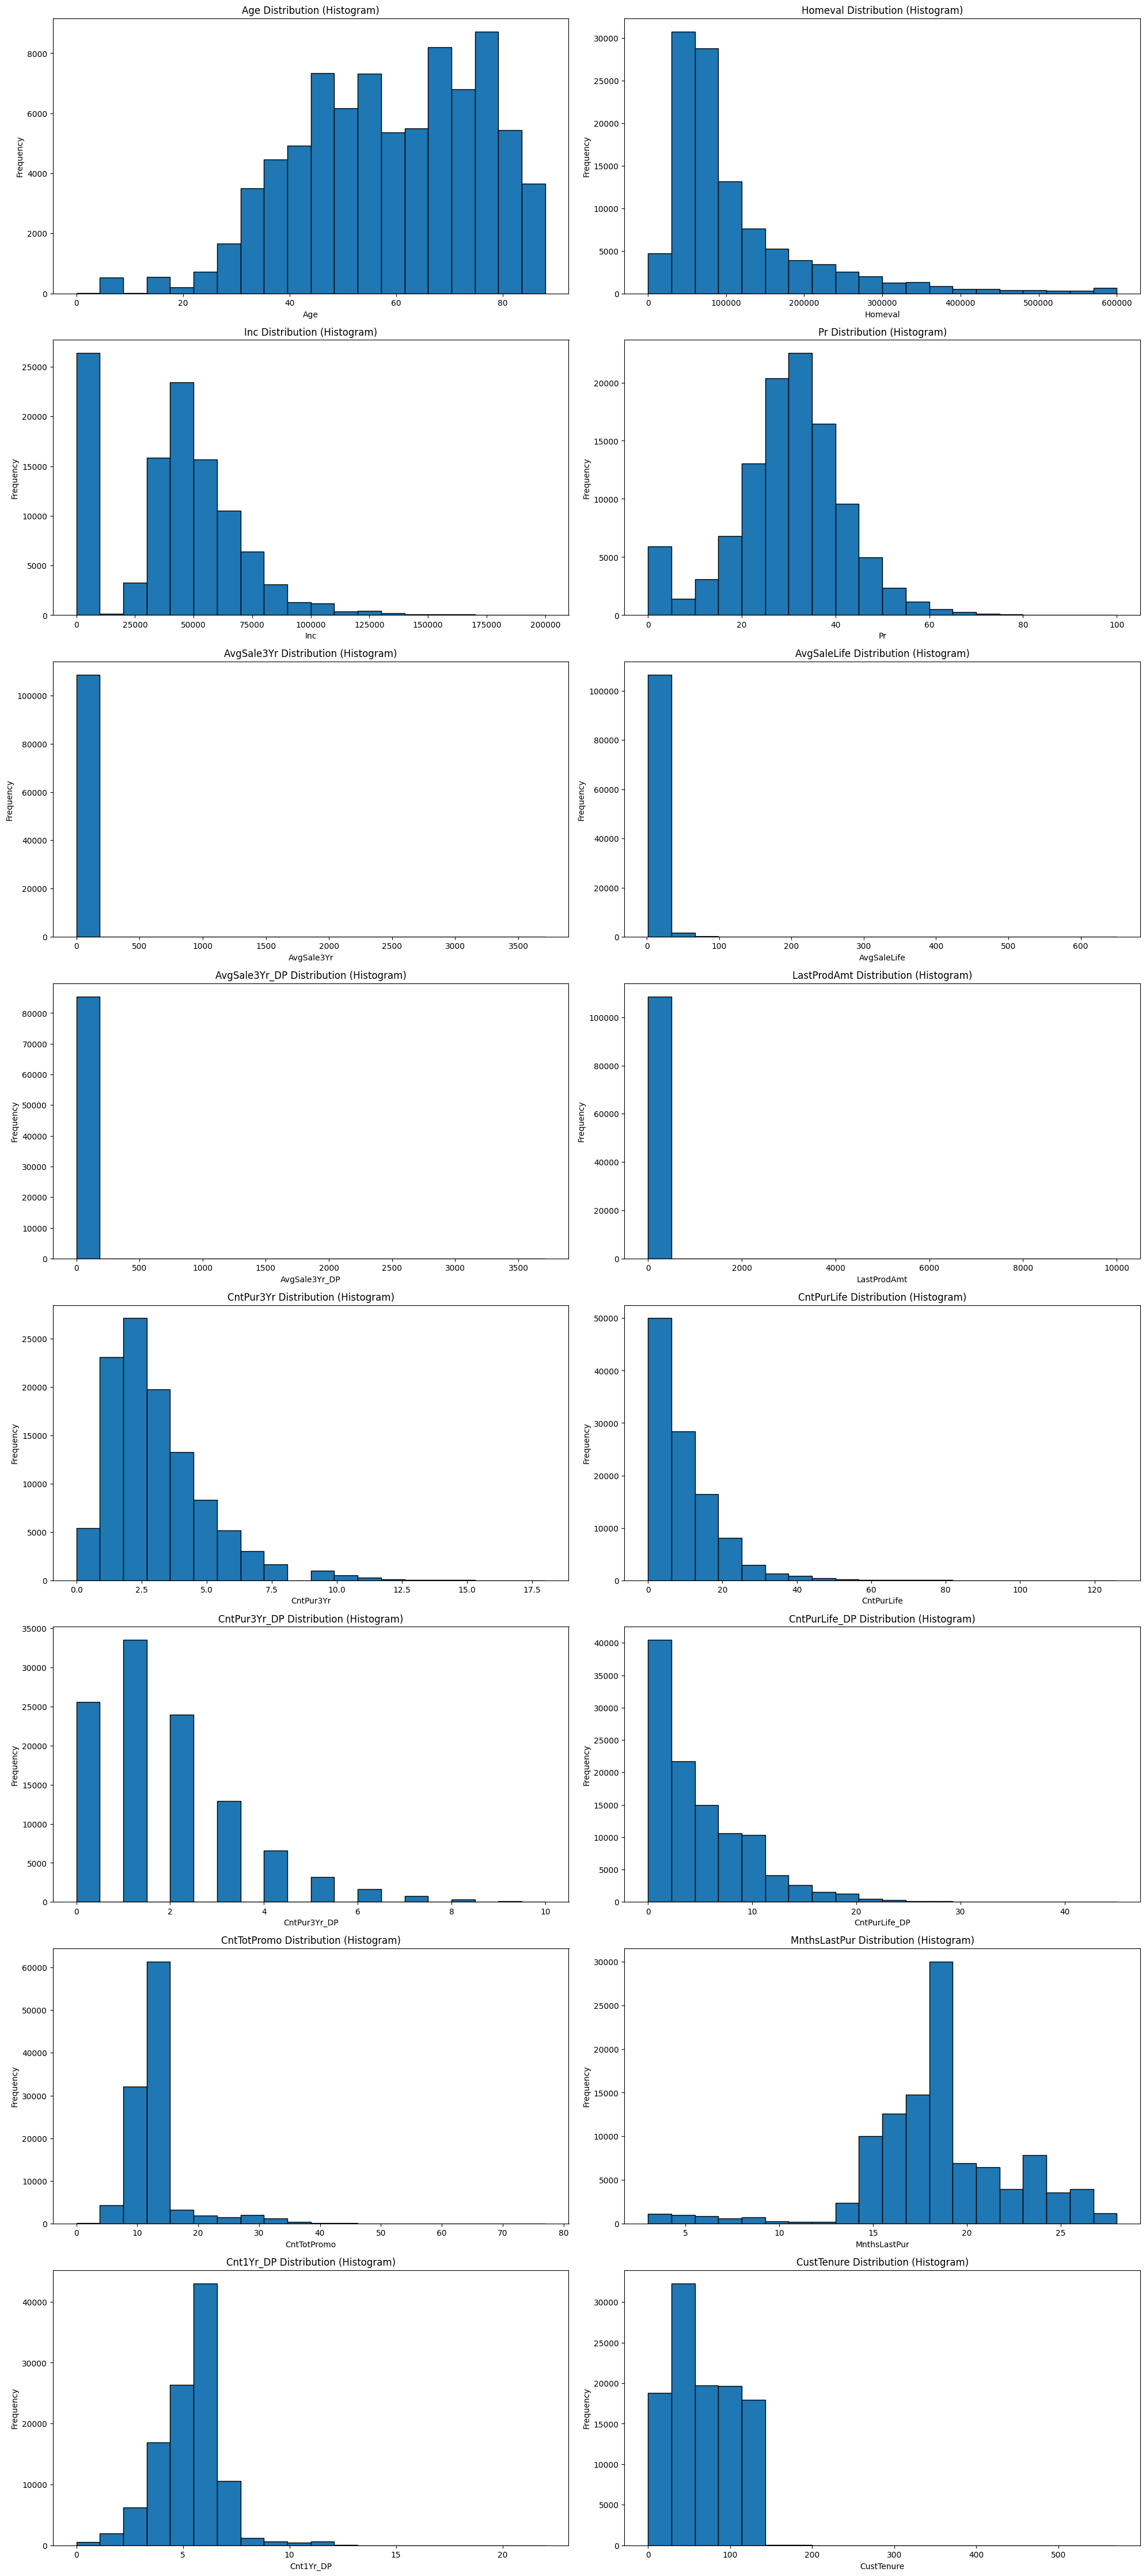

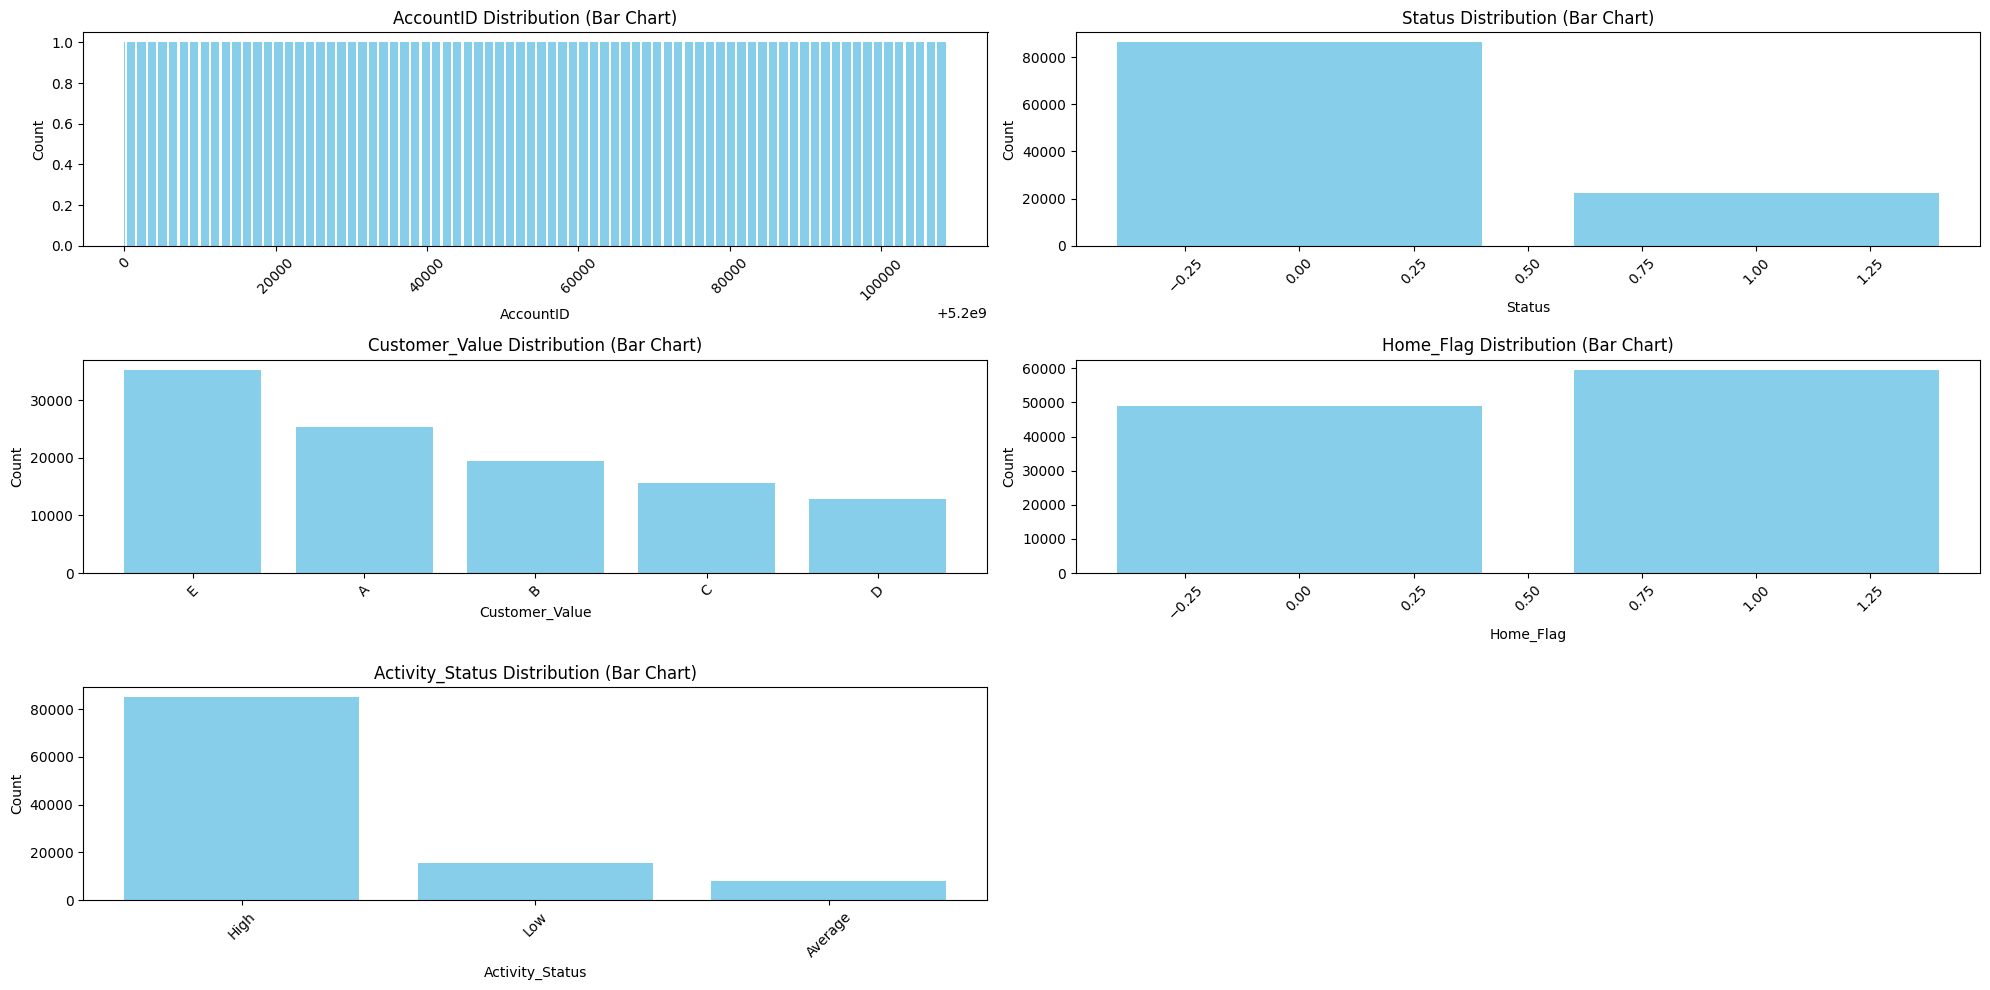

In [12]:
plot_variable_types(bank)

* Age is skewed to the left, have some customers under 18- consider dropping unless they are high worth customers.
* AvgSale3Yr, AvgSale3Yr_DP, AvgSaleLife and LastProdAmt are all highly concentrated in one bucket with samll number of positive outliers.
* Cnt1Yr_DP, CntPur3Yr, CntPur3Yr_DP, CntPurLife, CntPurLife_DP, CntTotPromo, CustTenure are all skewed to the right.
* Imbalanced dataset, with about 20% of data buying the insurance product and 80% not.

## 4. Data Wrangling

### Imputation

In [13]:
# Selecting only numeric columns
numeric_cols = bank.select_dtypes(include=np.number).columns

# Calculate mean of numeric columns
mean_values = bank[numeric_cols].mean()

# Fill missing values in numeric columns with their respective means
bank[numeric_cols] = bank[numeric_cols].fillna(mean_values)

### Lable encoding

* did not use one-hot encoding because want to preserve ordinality of variables

In [14]:
# Select categorical columns excluding 'Activity_Status' and 'Customer_Value'
categorical_cols = [col for col in bank.select_dtypes(include=['object']).columns if col != 'Activity_Status' and col != 'Customer_Value']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column using LabelEncoder
for col in categorical_cols:
    bank[col] = label_encoder.fit_transform(bank[col])

# Mapping for 'Activity_Status' and 'Customer_Value'
label_encoding = {
    'Activity_Status': {'High': 0, 'Average': 1, 'Low': 2},
    'Customer_Value': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}
}

# Apply mapping
for col, mapping in label_encoding.items():
    bank[col] = bank[col].map(mapping)

In [15]:
# checking result of parsing and imputation
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108600 entries, 0 to 108599
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   AccountID        108600 non-null  category
 1   Status           108600 non-null  category
 2   Customer_Value   108600 non-null  category
 3   Age              108600 non-null  float64 
 4   Home_Flag        108600 non-null  category
 5   Homeval          108600 non-null  int64   
 6   Inc              108600 non-null  int64   
 7   Pr               108600 non-null  int64   
 8   Activity_Status  108600 non-null  category
 9   AvgSale3Yr       108600 non-null  float64 
 10  AvgSaleLife      108600 non-null  float64 
 11  AvgSale3Yr_DP    108600 non-null  float64 
 12  LastProdAmt      108600 non-null  float64 
 13  CntPur3Yr        108600 non-null  int64   
 14  CntPurLife       108600 non-null  int64   
 15  CntPur3Yr_DP     108600 non-null  int64   
 16  CntPurLife_DP    108

### Splitting into train and test sets

In [16]:
x = bank.drop(['Status'], axis=1)
y = bank['Status']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2)

In [18]:
# checking split results
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(86880, 20)
(21720, 20)
(86880,)
(21720,)


## 5. Modelling

In [19]:
dt = DecisionTreeClassifier(max_depth=3)

In [20]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

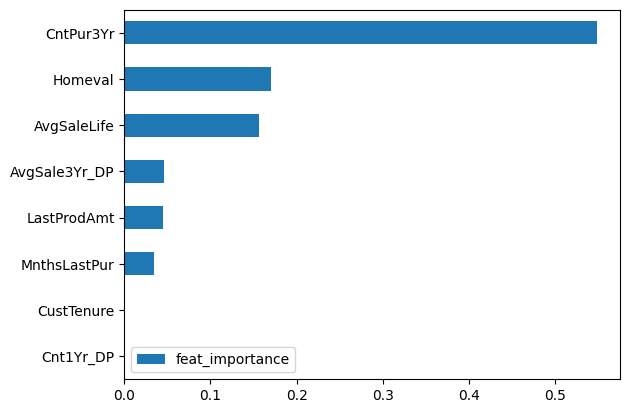

In [21]:
dt_feat = pd.DataFrame(dt.feature_importances_, index=X_train.columns, columns=['feat_importance'])
dt_feat.sort_values('feat_importance').tail(8).plot.barh()
plt.show()

In [22]:
train_accuracy = accuracy_score(y_train, dt.predict(X_train))
test_accuracy = accuracy_score(y_valid, dt.predict(X_valid))

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8269912523020257
Test Accuracy: 0.8236187845303867


In [23]:
test_report = classification_report(y_valid, dt.predict(X_valid), output_dict=True)
pd.DataFrame(test_report).T["recall"]

0               0.931428
1               0.415767
accuracy        0.823619
macro avg       0.673598
weighted avg    0.823619
Name: recall, dtype: float64